#
<span style="font-size:80px;">**Introduction**</span>

```
In this project I will explore data,visualizing them through different plots to investigate
whether is their any relationship between GDP and life expectency of six countries.
```
##
**What I am going to analize**
```
1.Has GDP grown up over time of six countries?
2.Has life expentancy increased over times  of each country?
3.is  there any corelation between GDP and life expectency of six countries?
4.what is the avarage life expectency in these nation?
5.what is the   distribution of  that life expentency  ?
```
###
**Data Sources**
```
World Bank  and World Health Organization


In [10]:
#import the premilionery module that used in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sms
import seaborn as sns

In [9]:
#loaded the csv file in pandas data frame
df=pd.read_csv("all_data.csv")
#information about the data set
print(df.info())
#Explore data
#seen the first 5 rows
print(df.head(5))
#modified the colmn name of "Life expectancy at birth (years)" to convinence  use
df.rename(columns={"Life expectancy at birth (years)":"life_expectency_year"},inplace=True)
print(df.head(5))
print("_________________________________________")
#name of the countries are in the data set
print("name of the countries")
print(df.Country.unique())
print("_______________________________________")
#year groups are in the data set
print(df.Year.unique())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
  Country  Year  life_expectency_year           GDP
0   Chile  2000  

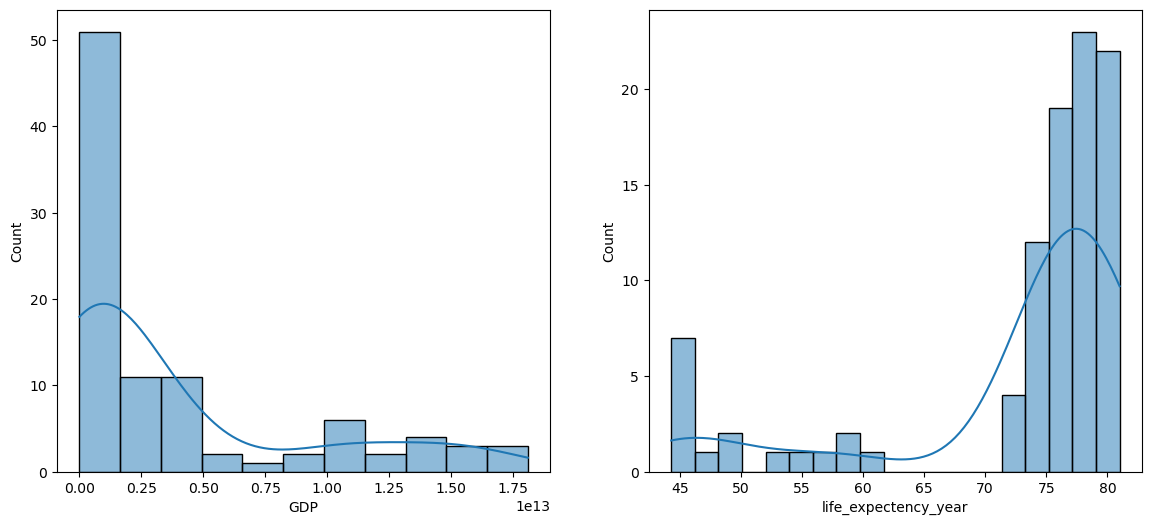

<Figure size 640x480 with 0 Axes>

In [11]:
#Exploratory plot
#the distribution of GDP of the data set
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(x="GDP",data=df,kde=True)
#the distribution of life expentancy per year of the data set
plt.subplot(1,2,2)
sns.histplot(x="life_expectency_year",data=df,kde=True)
plt.show()
plt.clf()


```
The GDP of the data set are right skew.
This type of distributon could be called power law distribution.
The life expectency of data set are left skewed that can be called negetively skewed distribution.



The avarage GDP of 6 countries:
                    Country           GDP
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


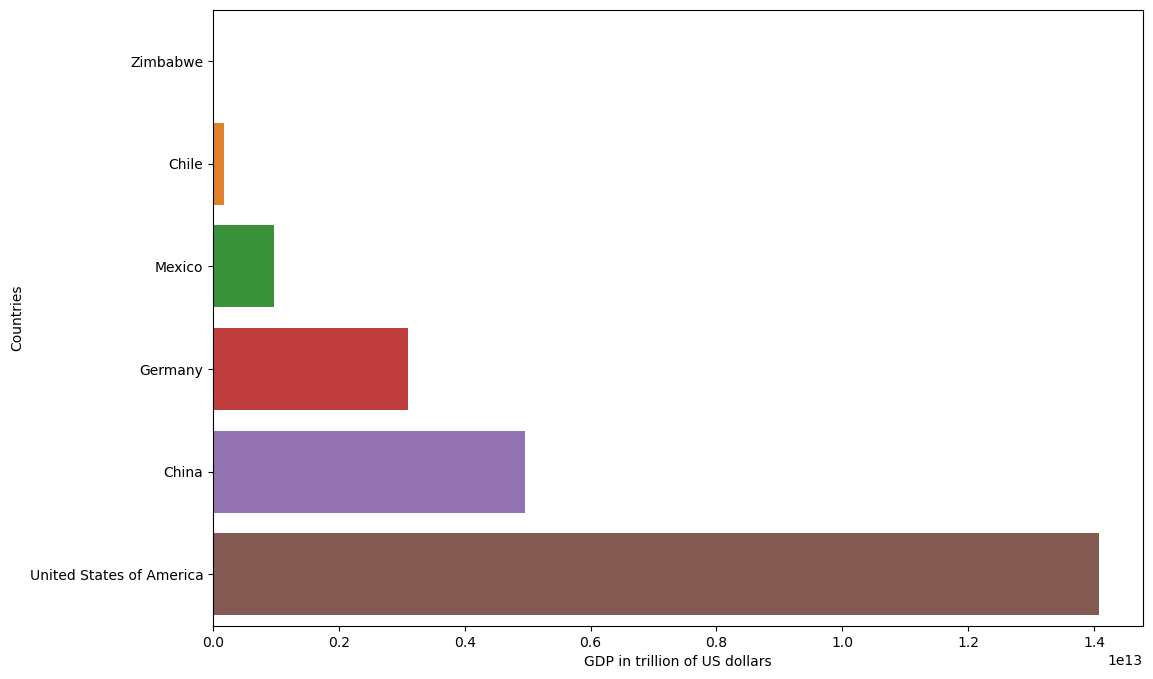

The avarage life expectency of 6 countries:
                    Country  life_expectency_year
0                     Chile              78.94375
1                     China              74.26250
2                   Germany              79.65625
3                    Mexico              75.71875
4  United States of America              78.06250
5                  Zimbabwe              50.09375


<Figure size 640x480 with 0 Axes>

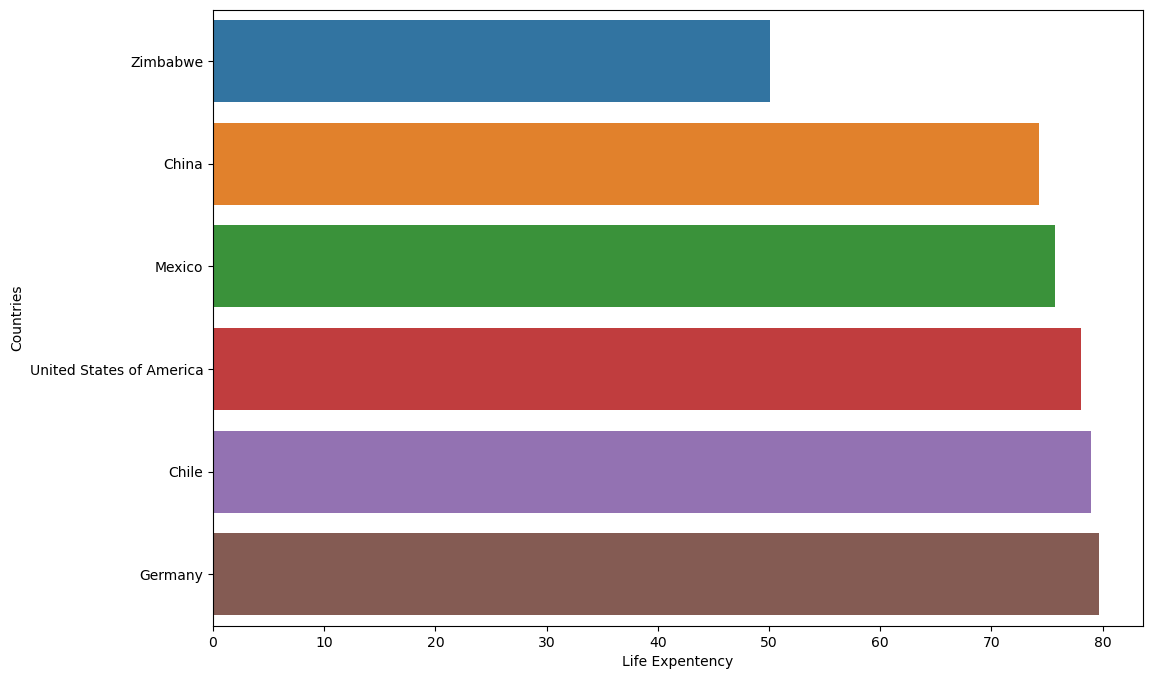

<Figure size 640x480 with 0 Axes>

In [12]:
#avarage GDP for Each Country
print("The avarage GDP of 6 countries:")
gdp_mean=df.groupby("Country").GDP.mean().reset_index()
print(gdp_mean)
#showed on bar plot
plt.figure(figsize=(12,8))
gdp=sns.barplot(x="GDP",y="Country",data=gdp_mean,order = gdp_mean.sort_values("GDP").Country)

plt.xlabel("GDP in trillion of US dollars")
plt.ylabel("Countries")
plt.show()
plt.clf()

#avarage life expentency of each country
print(f"The avarage life expectency of 6 countries:")
df_life_expentency=df.groupby("Country").life_expectency_year.mean().reset_index()
print(df_life_expentency)
#showed on bar plot
plt.figure(figsize=(12,8))
life=sns.barplot(x="life_expectency_year",y="Country",data=df_life_expentency,order=df_life_expentency.sort_values("life_expectency_year").Country)
plt.xlabel("Life Expentency")
plt.ylabel("Countries")
plt.show()
plt.clf()



```
The above two charts  shows the  avarage highst Gdp growth's country is United States of America.
In contrast the hightst  avarage life expectency Country is Germany

#
<span style="font-size:60px;"> **Line Plot**</span>

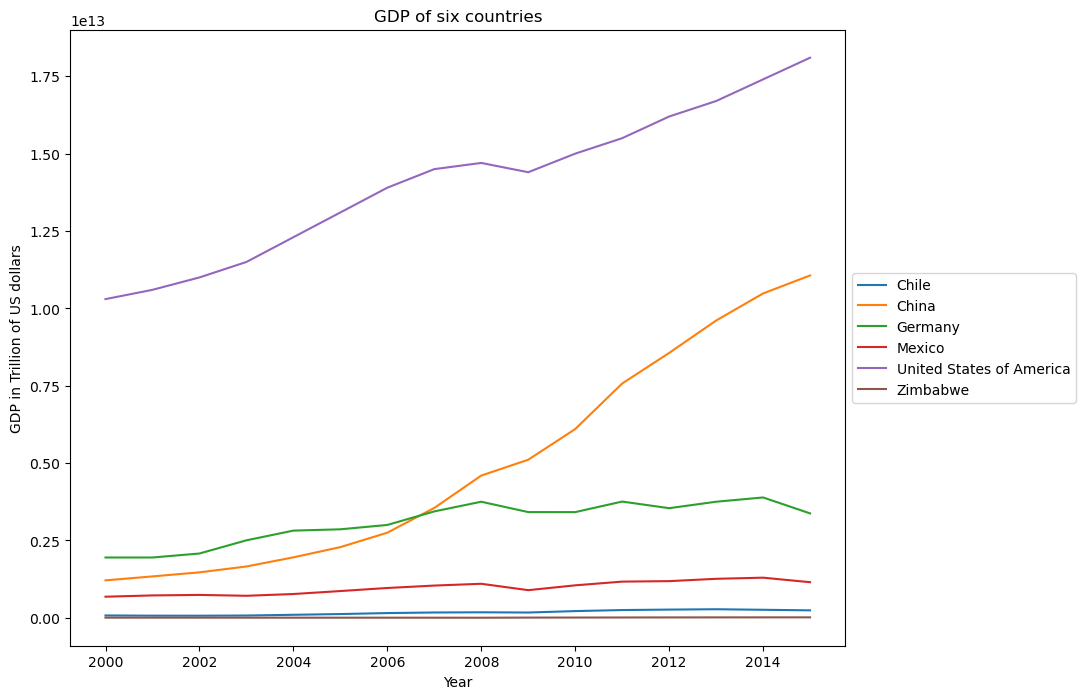

<Figure size 640x480 with 0 Axes>

In [13]:
#Year wise GDP in 6 countries with line plot
plt.figure(figsize=(10,8))
sns.lineplot(x="Year",y="GDP",hue="Country",data=df)
plt.title("GDP of six countries")
plt.xlabel("Year")
plt.ylabel("GDP in Trillion of US dollars")
plt.legend(bbox_to_anchor=(1,0.5),loc="center left")#offers a degree of control for manual legent placement 
plt.show()
plt.clf()


```
The line plot above refers United State of America and China has achieved their GDP well over time.US increased their GDP from 1 trillion  to more than one and three qutar trillion between 2000 to 2015 time span on the same time china increased less than quater trillion to one trillion.And other 4 countries GDP growth did not increased substantialy.we can see data  more clearly of  GDP of each countries individually using faceted line chart   

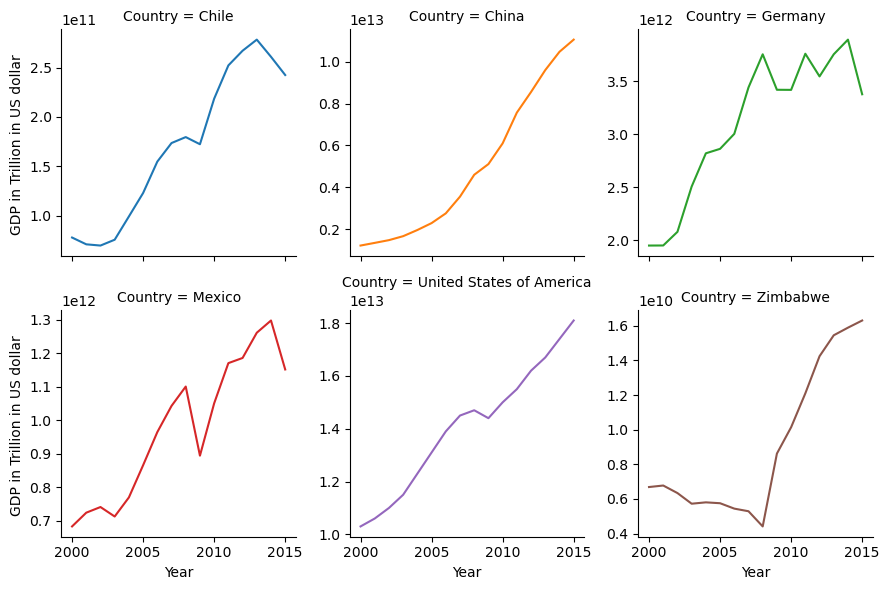

<Figure size 640x480 with 0 Axes>

In [14]:
#Inisialize a FaceGrid
g=sns.FacetGrid(df,col="Country",col_wrap=3,hue="Country",sharey=False) 
#map a line plot to each faceted
g.map(sns.lineplot,"Year","GDP")
#customise the facetedGrid
g.set_axis_labels("Year","GDP in Trillion in US dollar ")
plt.show()
plt.clf()

```
In the same way we can see the life expentency over the years in 6 countries through a line plot

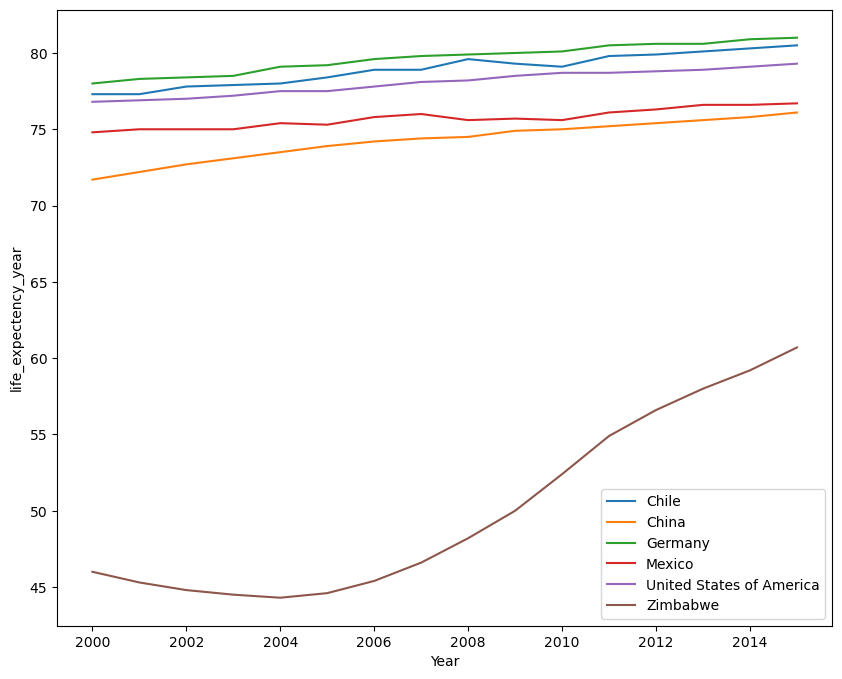

<Figure size 640x480 with 0 Axes>

In [15]:

#Year wise Life Expectency  in 6 countries with line plot
plt.figure(figsize=(10,8))#figure size has been larhe for beyyer seeing
sns.lineplot(x=df.Year,y=df.life_expectency_year,hue="Country",data=df)
plt.legend()
plt.show()
plt.clf()


```
The plot  above shows the life expentency of Zimbabawe was low since 2014 after it increased.On the other hand rest of the countries life expentency expanded in parallel manner.we can further investigate them more clearly by facetgrid.


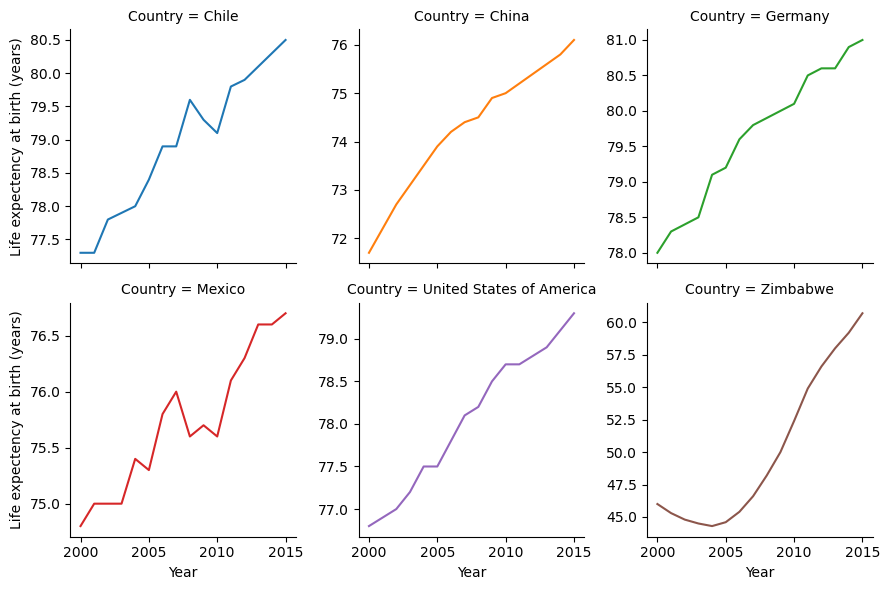

<Figure size 640x480 with 0 Axes>

In [16]:
#to see the 6 countries life expentancy data more deeply
#lets do the 6 individual plots using facetdGrid as every country has individual y axis
#Inisialize FacetedGrid
l=sns.FacetGrid(df,col="Country",hue="Country",col_wrap=3,sharey=False)
#sharey controls sharing of properties.True or all= x and y axis will be shared among all subplots.In contrast
#False or none= x and y axis will be independent of each subplot.
#map a line plot to Faceted
l.map(sns.lineplot,"Year","life_expectency_year")
#customise the plot
l.set_ylabels("Life expectency at birth (years)")
plt.show()
plt.clf()


```
Ploting by FacetedGrid it shows all countries life expectency rise and downfall in uphill pattern.However Zimbabwe life expentancy has gone down till 2005 after going up sharply.

#
<span style="font-size:60px;">**Side by side line Plot**</span>
```
To understand effectively each country's GDP and life expectency, side by side line plot has been drawn bellow.

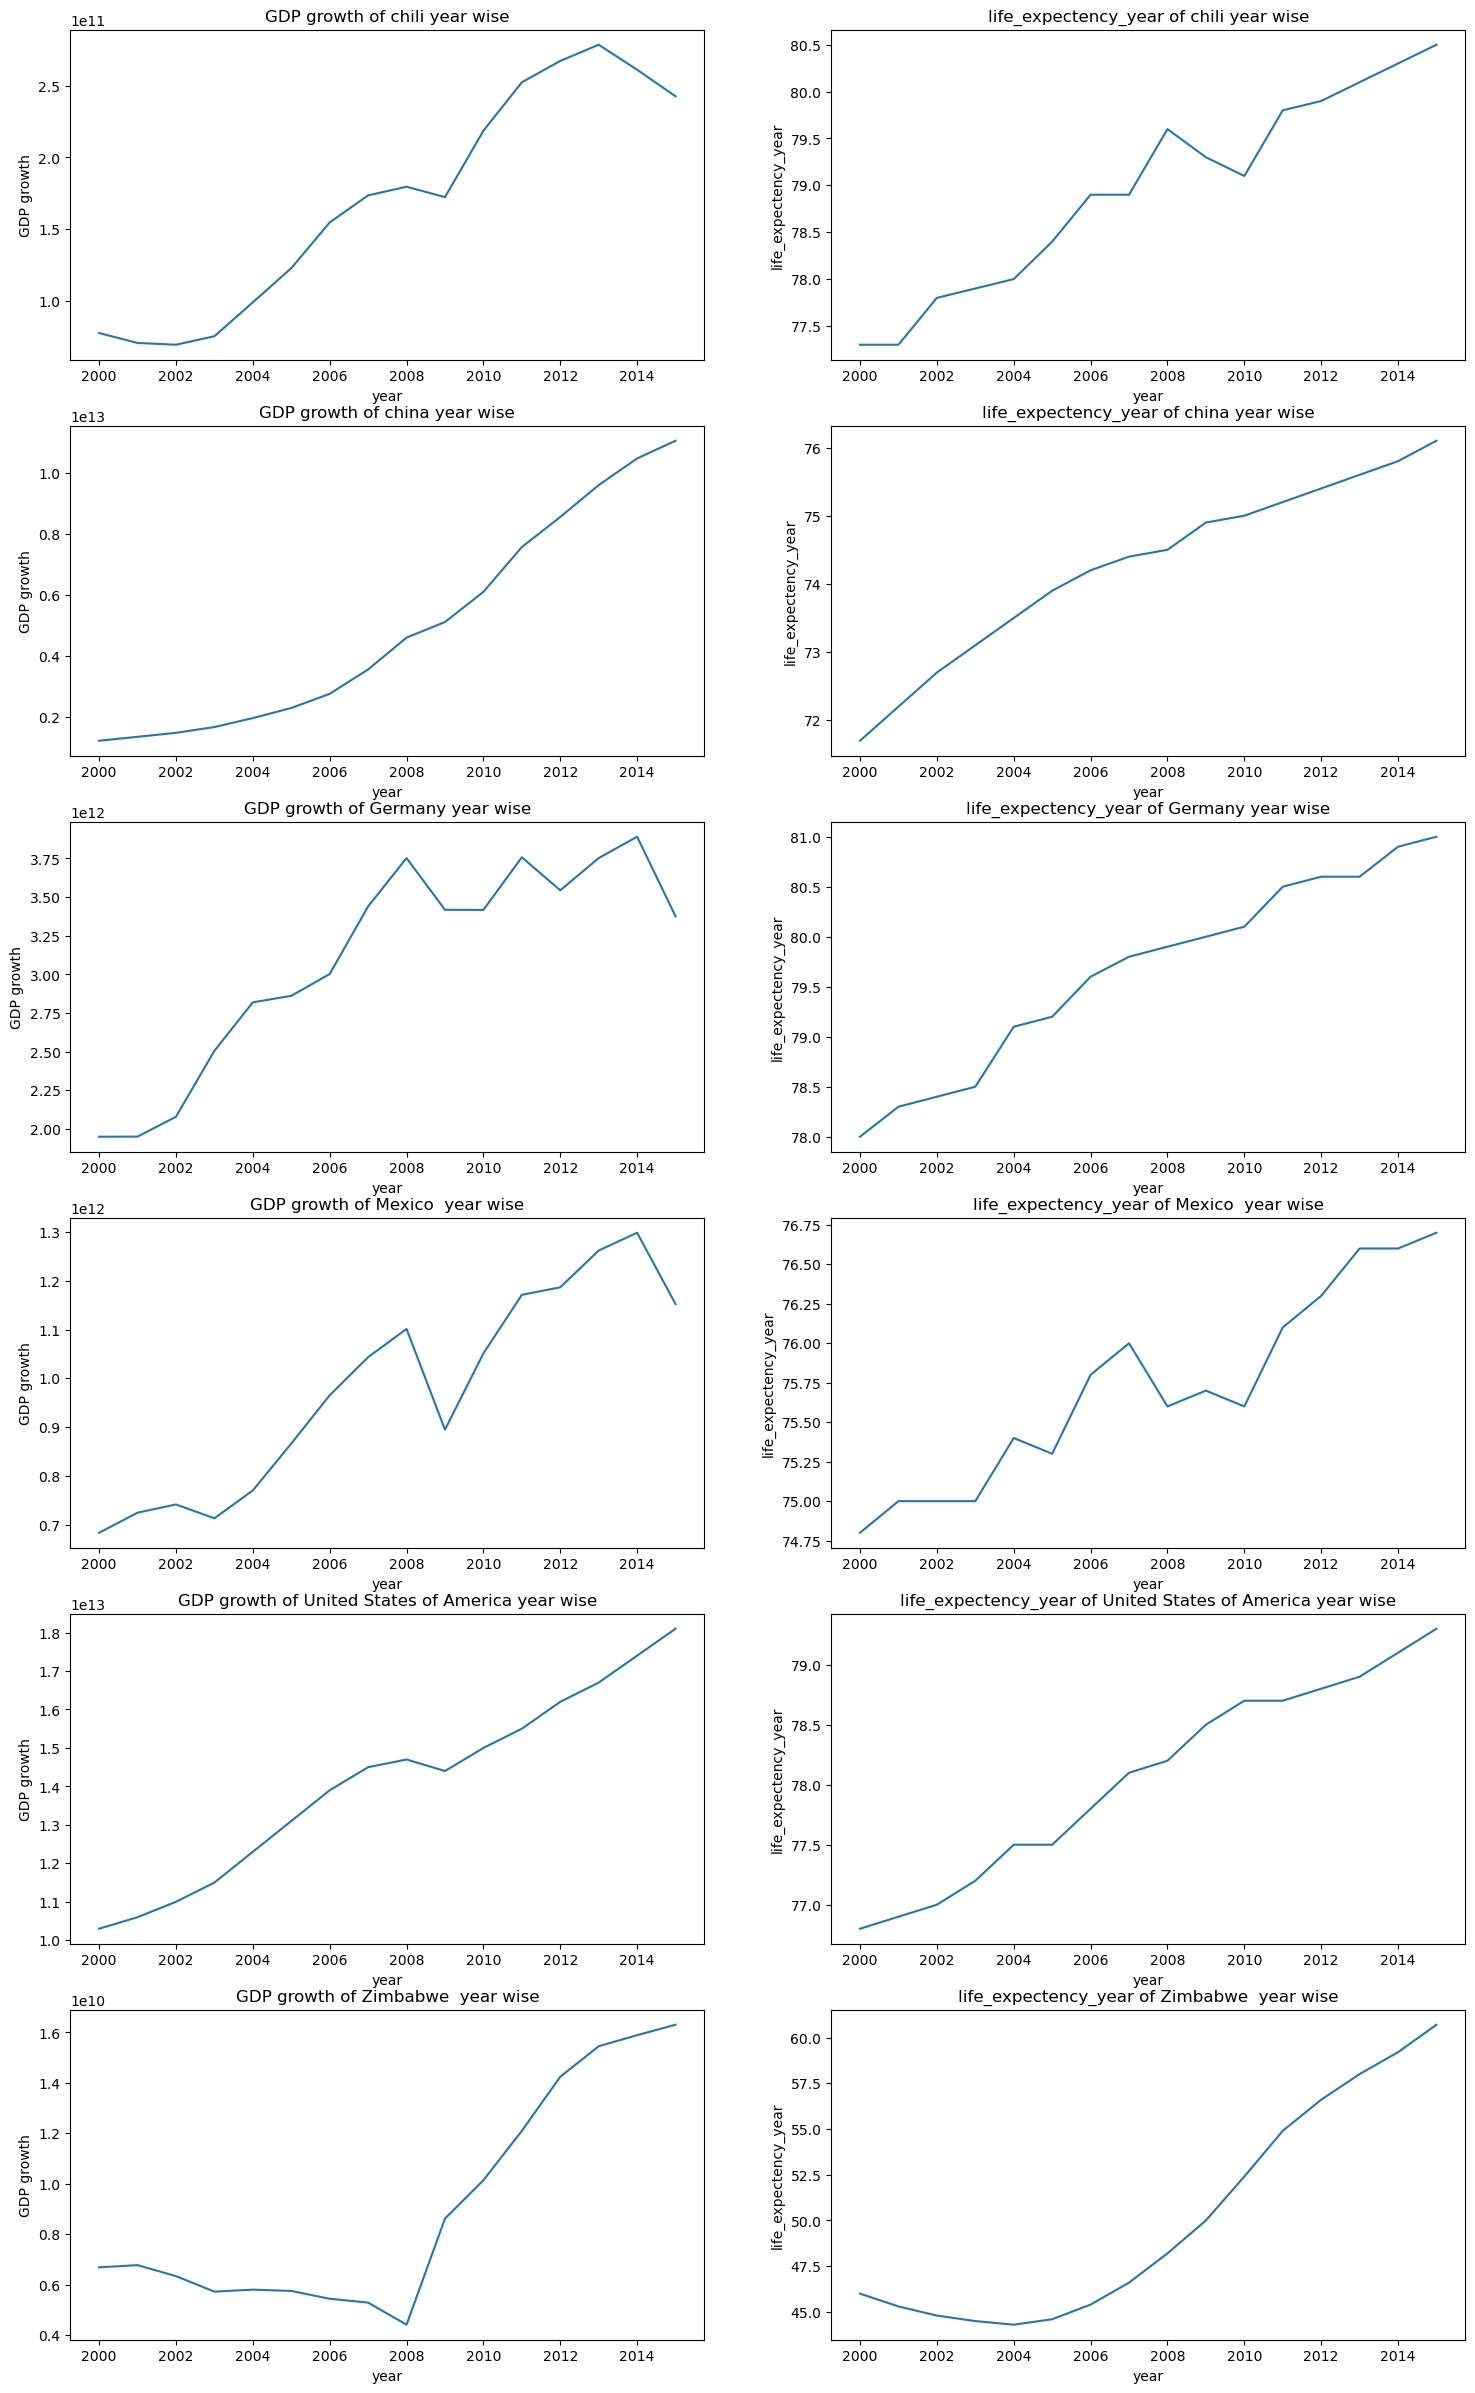

<Figure size 640x480 with 0 Axes>

In [9]:
#data visualization
#year wise GDP and life expentency of 6 countries side by side
plt.figure(figsize=(18,30))
#Chile
plt.subplot(6,2,1)
plt.plot(df.Year[df.Country=="Chile"],df.GDP[df.Country=="Chile"])
plt.title("GDP growth of chili year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,2)
plt.plot(df.Year[df.Country=="Chile"],df.life_expectency_year[df.Country=="Chile"])
plt.title("life_expectency_year of chili year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
#China
plt.subplot(6,2,3)
plt.plot(df.Year[df.Country=="China"],df.GDP[df.Country=="China"])
plt.title("GDP growth of china year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,4)
plt.plot(df.Year[df.Country=="China"],df.life_expectency_year[df.Country=="China"])
plt.title("life_expectency_year of china year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
#Germany
plt.subplot(6,2,5)
plt.plot(df.Year[df.Country=="Germany"],df.GDP[df.Country=="Germany"])
plt.title("GDP growth of Germany year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,6)
plt.plot(df.Year[df.Country=="Germany"],df.life_expectency_year[df.Country=="Germany"])
plt.title("life_expectency_year of Germany year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
#Mexico
plt.subplot(6,2,7)
plt.plot(df.Year[df.Country=="Mexico"],df.GDP[df.Country=="Mexico"])
plt.title("GDP growth of Mexico  year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,8)
plt.plot(df.Year[df.Country=="Mexico"],df.life_expectency_year[df.Country=="Mexico"])
plt.title("life_expectency_year of Mexico  year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
#United State of America
plt.subplot(6,2,9)
plt.plot(df.Year[df.Country=="United States of America"],df.GDP[df.Country=="United States of America"])
plt.title("GDP growth of United States of America year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,10)
plt.plot(df.Year[df.Country=="United States of America"],df.life_expectency_year[df.Country=="United States of America"])
plt.title("life_expectency_year of United States of America year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
#Zimbabwe
plt.subplot(6,2,11)
plt.plot(df.Year[df.Country=="Zimbabwe"],df.GDP[df.Country=="Zimbabwe"])
plt.title("GDP growth of Zimbabwe  year wise")
plt.xlabel("year")
plt.ylabel("GDP growth")
plt.subplot(6,2,12)
plt.plot(df.Year[df.Country=="Zimbabwe"],df.life_expectency_year[df.Country=="Zimbabwe"])
plt.title("life_expectency_year of Zimbabwe  year wise")
plt.xlabel("year")
plt.ylabel("life_expectency_year")
plt.show()
plt.clf()










#
<span style="font-size:60px;">**Scatter Plot**</span>
```
Let's see is there any correlation between life expentency and gdp between 6 countries in a single plot

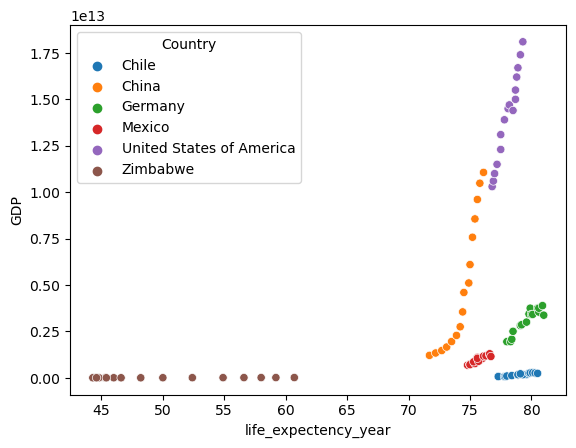

<Figure size 640x480 with 0 Axes>

In [17]:

sns.scatterplot(x="life_expectency_year",y="GDP",hue="Country",data=df)
plt.show()
plt.clf()

```
The scatter plot shows Zimbabwe and chili's life expectency increase but their gdp ramain flat.Maxico and Germany's GDP goes up a bit  on  life expentency rises.Eventually GDP and life expectency are highly corelated of United State of America and Chili.To have a closer look let's breake up above scatter plot by country using facetedGrid

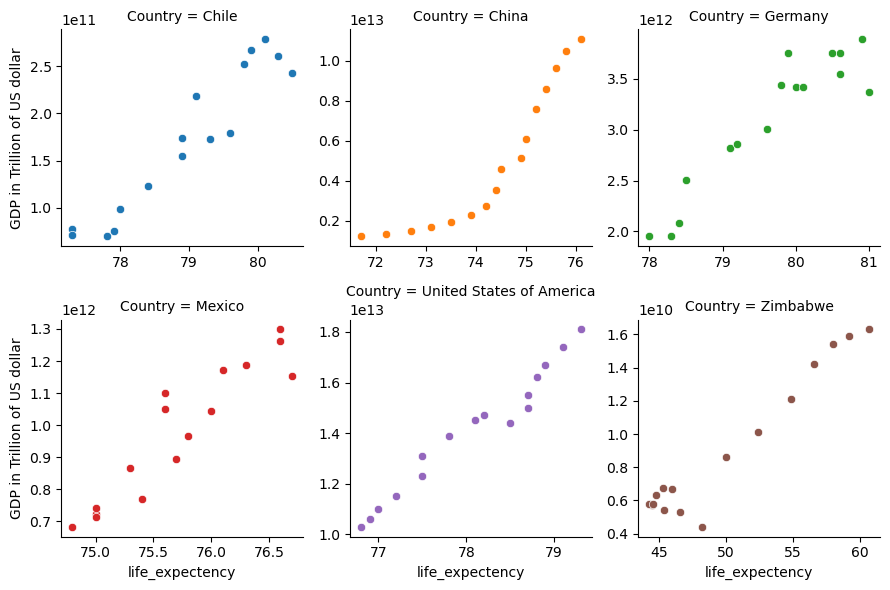

<Figure size 640x480 with 0 Axes>

In [18]:

#inisialized a face greed
g=sns.FacetGrid(data=df,col="Country",hue="Country",col_wrap=3,sharey=False,sharex=False)
#sharex=False means each subplot's x-axis will be independent.sharex=True refers all subplot will share an x-axis
#map a line plot to faceted
g.map(sns.scatterplot,"life_expectency_year","GDP")
g.set_axis_labels("life_expectency","GDP in Trillion of US dollar")
plt.show()
plt.clf()

```
 Above plots show there is a liner relationship between GDP and life expectency among all the countries.Though there is a little curve in China.In general sense we can say that there is a positive correlation between GDP and life expectency of all countries. 

#
<span style="font-size:80px;">**Conculations**</span>
```
According to the given data I have made some vitualizations on basis of my requirments and found anawers those are given bellow:
```
☐ GDP has increased over times of countries.However Zimbabwe was a bit slow while China has been on great position.</br>

☐The life expectency extended each country's where zimbabwe increased their life expentecy after a certain time.</br>

☐ All of the countries has a  positive correlation between GDP and life expentency.</br>

☐ Avarage life expectency all these countries are fairly 70's except Zimbabwe, it has only 50.</br>

☐ The  distribution of life expectency are left skew that refers most of the data are in right side</br>

   Though I have researched on 94 rows of data Ihave got in the table.

#
<span style="font-size:80px;">**Further Analysis**</span>
```
The study shows the top avarage GDP belongs to USA whereas the top avarage life expectency holds Germany.if there is a correlation between GDP and life expectency, so why USA or Germany is not on the top list on both side of  GDP and life expectency? That needs to further investigate.